In [1]:
import os
from pathlib import Path
os.chdir("/Users/mregan/Dev/litmus/")
print(Path.cwd())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

/Users/mregan/Dev/litmus


In [2]:
import pandas as pd
import numpy as np

from user_data.litmus import get_labeled_data
from user_data.litmus import meta_model

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [21]:
ld = get_labeled_data.GetLabeledData(
    timeframe='5m',
    bt_filename='backtest_kamaprimary-2022-07-01_20-20-16.json',
    bt_pkl_filename='backtest_kamaprimary-2022-07-01_20-20-16_signals.pkl')

In [22]:
df = ld.get_all_data()
df

open      high       low  \
strategy    pair      date                                                      
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00  296.7820  299.2500  296.5730   
                      2021-02-01 03:55:00+00:00  298.1550  300.0000  298.1550   
                      2021-02-01 11:00:00+00:00  294.2780  296.5880  292.2930   
                      2021-02-01 14:40:00+00:00  291.3340  292.0660  291.0000   
                      2021-02-01 16:25:00+00:00  288.7980  290.2850  287.5510   
...                                                   ...       ...       ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00    1.4891    1.4900    1.4854   
                      2021-02-10 22:05:00+00:00    1.4820    1.4898    1.4804   
                      2021-02-10 22:25:00+00:00    1.4833    1.4909    1.4833   
                      2021-02-10 23:25:00+00:00    1.4911    1.4967    1.4899   
                      2021-02-11 02:00:00+00:00    1.4819    1.4986    1.4819   

                                                    close     volume  \
strategy    pair      date                                             
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00  298.3560    446.729   
                      2021-02-01 03:55:00+00:00  299.8440   1371.821   
                      2021-02-01 11:00:00+00:00  295.9600   2464.618   
                      2021-02-01 14:40:00+00:00  291.5250    664.760   
                      2021-02-01 16:25:00+00:00  289.9250   1938.784   
...                                                   ...        ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00    1.4867  39742.040   
                      2021-02-10 22:05:00+00:00    1.4855  22559.940   
                      2021-02-10 22:25:00+00:00    1.4896  23645.420   
                      2021-02-10 23:25:00+00:00    1.4960  63085.070   
                      2021-02-11 02:00:00+00:00    1.4980  33662.150   

                                                   volume_adi    volume_obv  \
strategy    pair      date                                                    
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00  3.638818e+03 -1.490190e+04   
                      2021-02-01 03:55:00+00:00  5.314058e+03 -1.508876e+04   
                      2021-02-01 11:00:00+00:00  2.811667e+03 -2.047193e+04   
                      2021-02-01 14:40:00+00:00  1.154047e+03 -2.682465e+04   
                      2021-02-01 16:25:00+00:00 -3.630940e+03 -2.446863e+04   
...                                                       ...           ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00  2.242354e+07  3.292762e+07   
                      2021-02-10 22:05:00+00:00  2.240421e+07  3.292819e+07   
                      2021-02-10 22:25:00+00:00  2.243349e+07  3.300359e+07   
                      2021-02-10 23:25:00+00:00  2.252229e+07  3.300315e+07   
                      2021-02-11 02:00:00+00:00  2.222995e+07  3.258176e+07   

                                                 volume_cmf   volume_fi  \
strategy    pair      date                                                
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00   -0.123423  183.944551   
                      2021-02-01 03:55:00+00:00    0.146320  347.568759   
                      2021-02-01 11:00:00+00:00    0.022380  571.164980   
                      2021-02-01 14:40:00+00:00    0.006453  633.435327   
                      2021-02-01 16:25:00+00:00   -0.198226 -141.772101   
...                                                     ...         ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00   -0.248250   35.186325   
                      2021-02-10 22:05:00+00:00   -0.148487   -2.820973   
                      2021-02-10 22:25:00+00:00   -0.074115   25.280220   
                      2021-02-10 23:25:00+00:00    0.125712   84.833566   
                      2021-02-11 02:00:00+00:00   -0.169138   22.577678   

                                                     volum

In [23]:
df['exit_reason'].value_counts()

lower_barrier_sl_sell          4066
vertical_barrier_force_sell    2381
upper_barrier_pt_sell          1887
force_exit                        2
Name: exit_reason, dtype: int64

In [25]:
# Tripple barrier target setting method

tbm_target = 'upper_based'

if tbm_target == 'upper_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['exit_reason'].isin(['upper_barrier_pt_sell']), True, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['lower_barrier_sl_sell', 'vertical_barrier_force_sell']), False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])

elif tbm_target == 'sign_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['profit_ratio'] > 0, True, df['y_true'])
    df['y_true'] = np.where(df['profit_ratio'] <= 0, False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])
    
df['y_true'].value_counts()

0.0    6447
1.0    1887
Name: y_true, dtype: int64

In [26]:
df['y_pred'] = True

In [27]:
# Train ML model to predict 'correct_trade'

model_features = ['kama', 'kama_delta', 'kama_threshold']

pair_only_features = [
       'volume_cmf', 'volume_fi', 'volume_em',
       'volume_vpt',  'volume_mfi',
       'volatility_bbw', 'volatility_bbp',  'volatility_kcw', 'volatility_kcp',
       'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd_diff', 
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_mass_index',
       'trend_dpo', 'trend_kst_diff',
       'trend_stc', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_cci', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind',
       'momentum_rsi', 'momentum_stoch_rsi', 'momentum_stoch_rsi_k',
       'momentum_stoch_rsi_d', 'momentum_tsi', 'momentum_uo',
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_roc', 'momentum_ppo',
       'momentum_ppo_signal', 'momentum_ppo_hist', 'momentum_pvo',
       'momentum_pvo_signal', 'momentum_pvo_hist',
       'others_dr', 'others_dlr']

btc_5m = ['volume_cmf_btc_5m', 'volume_fi_btc_5m', 'volume_em_btc_5m', 'volume_vpt_btc_5m',
        'volume_mfi_btc_5m',
       'volatility_bbw_btc_5m',
       'volatility_bbp_btc_5m',
       'volatility_kcw_btc_5m', 'volatility_kcp_btc_5m', 'volatility_dcw_btc_5m',
       'volatility_dcp_btc_5m',
       'volatility_ui_btc_5m', 'trend_macd_btc_5m',
       'trend_macd_diff_btc_5m',
       'trend_vortex_ind_pos_btc_5m', 'trend_vortex_ind_neg_btc_5m',
       'trend_vortex_ind_diff_btc_5m', 'trend_trix_btc_5m',
       'trend_mass_index_btc_5m', 'trend_dpo_btc_5m',
       'trend_kst_btc_5m', 'trend_kst_sig_btc_5m',
       'trend_kst_diff_btc_5m', 'trend_stc_btc_5m',
       'trend_adx_btc_5m', 'trend_adx_pos_btc_5m',
       'trend_adx_neg_btc_5m', 'trend_cci_btc_5m',
       'trend_aroon_up_btc_5m',
       'trend_aroon_down_btc_5m', 'trend_aroon_ind_btc_5m',
       'momentum_rsi_btc_5m',
       'momentum_stoch_rsi_btc_5m', 'momentum_stoch_rsi_k_btc_5m',
       'momentum_stoch_rsi_d_btc_5m', 'momentum_tsi_btc_5m',
       'momentum_uo_btc_5m', 'momentum_stoch_btc_5m',
       'momentum_stoch_signal_btc_5m', 'momentum_wr_btc_5m',
       'momentum_ao_btc_5m', 'momentum_roc_btc_5m',
       'momentum_ppo_btc_5m',
       'momentum_ppo_hist_btc_5m', 'momentum_pvo_btc_5m',
       'momentum_pvo_signal_btc_5m', 'momentum_pvo_hist_btc_5m',
       'others_dr_btc_5m', 'others_dlr_btc_5m']

btc_1h = ['volume_cmf_btc_1h', 'volume_fi_btc_1h', 'volume_em_btc_1h', 'volume_vpt_btc_1h',
        'volume_mfi_btc_1h',
       'volatility_bbw_btc_1h',
       'volatility_bbp_btc_1h',
       'volatility_kcw_btc_1h', 'volatility_kcp_btc_1h', 'volatility_dcw_btc_1h',
       'volatility_dcp_btc_1h',
       'volatility_ui_btc_1h', 'trend_macd_btc_1h',
       'trend_macd_diff_btc_1h',
       'trend_vortex_ind_pos_btc_1h', 'trend_vortex_ind_neg_btc_1h',
       'trend_vortex_ind_diff_btc_1h', 'trend_trix_btc_1h',
       'trend_mass_index_btc_1h', 'trend_dpo_btc_1h',
       'trend_kst_btc_1h', 'trend_kst_sig_btc_1h',
       'trend_kst_diff_btc_1h', 'trend_stc_btc_1h',
       'trend_adx_btc_1h', 'trend_adx_pos_btc_1h',
       'trend_adx_neg_btc_1h', 'trend_cci_btc_1h',
       'trend_aroon_up_btc_1h',
       'trend_aroon_down_btc_1h', 'trend_aroon_ind_btc_1h',
       'momentum_rsi_btc_1h',
       'momentum_stoch_rsi_btc_1h', 'momentum_stoch_rsi_k_btc_1h',
       'momentum_stoch_rsi_d_btc_1h', 'momentum_tsi_btc_1h',
       'momentum_uo_btc_1h', 'momentum_stoch_btc_1h',
       'momentum_stoch_signal_btc_1h', 'momentum_wr_btc_1h',
       'momentum_ao_btc_1h', 'momentum_roc_btc_1h',
       'momentum_ppo_btc_1h',
       'momentum_ppo_hist_btc_1h', 'momentum_pvo_btc_1h',
       'momentum_pvo_signal_btc_1h', 'momentum_pvo_hist_btc_1h',
       'others_dr_btc_1h', 'others_dlr_btc_1h']

best = ['momentum_uo_btc_5m', 'trend_stc_btc_1h',
       'momentum_roc_btc_5m',
       'volatility_bbw_btc_5m',
       'momentum_stoch_rsi_btc_1h', 'trend_stc',
       'momentum_stoch_rsi_k_btc_1h',
       'momentum_ppo',
       'momentum_ao_btc_1h',
       'volatility_dcp_btc_5m', 'momentum_pvo',
       'momentum_stoch', 'volume_cmf',
       'volatility_bbw_btc_1h',
       'volatility_kcp_btc_1h', 'volume_fi_btc_1h',
       'volume_em_btc_5m', 'momentum_stoch_btc_1h',
       'momentum_uo_btc_1h',
       'volatility_dcw_btc_5m',
       'momentum_rsi_btc_1h',
       'volume_mfi_btc_1h', 'trend_adx_btc_5m',
       'momentum_stoch_rsi_k', 'trend_cci_btc_1h',
       'trend_kst_btc_5m', 'volatility_dcp',
       'trend_aroon_ind_btc_1h',
       'trend_vortex_ind_neg_btc_5m',
       'volatility_dcw', 'others_dr_btc_5m',
       'trend_aroon_up_btc_5m',
       'momentum_stoch_signal',
       'momentum_wr_btc_5m',
       'momentum_pvo_signal_btc_5m',
       'trend_kst_diff_btc_5m', 'momentum_rsi']

best2 = ['transactions_transfers_volume_within_exchanges_sum_ppo_1d',
       'trend_vortex_ind_pos_btc_5m',
       'indicators_sol_3y_5y_ppo_1d',
       'volatility_kcp',
       'market_marketcap_usd_x_ppo_1d',
       'momentum_tsi',
       'momentum_stoch_rsi_k_btc_5m',
       'transactions_transfers_volume_from_exchanges_sum_ppo_1d',
       'indicators_realized_profit_ppo_1d',
       'momentum_stoch_signal_btc_1h',
       'volatility_kcw_btc_1h', 'volume_fi_btc_1h',
       'momentum_ppo_hist_btc_1h',
       'supply_issued_ppo_1d', 'volume_em_btc_1h',
       'momentum_roc_btc_5m',
       'indicators_sopr_ppo_1d', 'momentum_stoch',
       'volume_vpt_btc_1h',
       'transactions_transfers_volume_adjusted_median_ppo_1d',
       'supply_current_adjusted_ppo_1d',
       'transactions_transfers_volume_adjusted_mean_ppo_1d',
       'blockchain_utxo_spent_value_median_ppo_1d',
       'indicators_svl_7y_10y_ppo_1d',
       'volatility_bbp_btc_1h', 'volatility_dcw',
       'trend_stc', 'trend_vortex_ind_pos',
       'momentum_roc',
       'indicators_cdd_supply_adjusted_binary_ppo_1d',
       'indicators_asol_ppo_1d',
       'volatility_bbw_btc_5m', 'volume_mfi_btc_1h',
       'transactions_transfers_between_exchanges_count_ppo_1d',
       'trend_vortex_ind_neg_btc_5m']

precision_best_all = ['trend_macd_diff_btc_5m',
 'volatility_kcp_btc_1h',
 'volatility_bbp_btc_1h',
 'trend_trix_btc_5m',
 'momentum_ppo_btc_5m',
 'trend_adx_pos_btc_1h',
 'indicators_stock_to_flow_deflection_ppo_1d',
 'supply_active_7y_10y_ppo_1d',
 'volatility_kcp',
 'indicators_liveliness_ppo_1d',
 'trend_macd_btc_1h',
 'trend_vortex_ind_pos_btc_1h',
 'market_price_usd_close_ppo_1d',
 'volatility_dcw',
 'volatility_dcw_btc_1h',
 'market_marketcap_usd_x_ppo_1d',
 'momentum_stoch_signal_btc_1h',
 'trend_kst_btc_1h',
 'volume_mfi',
 'indicators_svl_3m_6m_ppo_1d',
 'volatility_dcw_btc_5m',
 'blockchain_block_interval_mean_ppo_1d',
 'indicators_realized_profits_to_value_ratio_ppo_1d',
 'volatility_ui',
 'momentum_ppo_hist_btc_5m',
 'indicators_sol_5y_7y_ppo_1d',
 'blockchain_utxo_created_value_mean_ppo_1d',
 'indicators_svl_1d_1w_ppo_1d',
 'trend_kst_diff_btc_1h',
 'momentum_pvo_hist',
 'volatility_dcp_btc_5m',
 'trend_adx_pos_btc_5m'
]

exclude = []
exclude = ['gn_10m__v1_metrics_transactions_transfers_volume_between_exchanges_sum_ppo_16_10m', 'gn_10m__v1_metrics_transactions_transfers_between_exchanges_count_ppo_20_10m']

gn_cols = [c for c in df.columns if 'gn_' in c and c not in exclude]

all_features = pair_only_features + btc_5m + btc_1h + model_features + gn_cols
basic = pair_only_features + model_features

gn_test = best + gn_cols

In [28]:
# Drop BTC

try:
    df = df.drop('BTC/USDT', level='pair', axis=0)
except:
    pass

In [29]:
# Limit training data so we can backest with holdout
idx = pd.IndexSlice

model = meta_model.MetaModel(data=df.loc[idx[:, :, :]], 
                     X_features_num=basic,
                     X_features_cat=['pair_copy'],
                     y_pred_col='y_pred', 
                     y_true_col='y_true',
                     sample_weight_col='profit_ratio')

In [30]:
model.check_data()

DataFrame contains NaNs which should be addressed before proceeding 

List of features with NaNs are: 

y_true    2
dtype: int64

To remove rows with these NaN, call clean_data()


In [31]:
model.clean_data()

Removed 1 NaN / Infinity observations from DataFrame


In [32]:
model.classification_report(model='primary')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      6447
         1.0       0.23      1.00      0.37      1887

    accuracy                           0.23      8334
   macro avg       0.11      0.50      0.18      8334
weighted avg       0.05      0.23      0.08      8334



In [33]:
model.run_cross_validation(cv_n_splits=5, cv_gap=40)

Train: 2021-02-01 2021-02-02 Test: 2021-02-02 2021-02-04
Train: 2021-02-02 2021-02-04 Test: 2021-02-04 2021-02-06
Train: 2021-02-03 2021-02-06 Test: 2021-02-06 2021-02-08
Train: 2021-02-05 2021-02-08 Test: 2021-02-08 2021-02-09
Train: 2021-02-07 2021-02-09 Test: 2021-02-09 2021-02-28


In [34]:
model.classification_report(model='meta')

              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87      5351
         1.0       0.26      0.02      0.03      1594

    accuracy                           0.76      6945
   macro avg       0.52      0.50      0.45      6945
weighted avg       0.65      0.76      0.67      6945



In [ ]:
model.get_most_important_features(cv_n_splits=5, cv_gap=40, cv_sample=100)

In [ ]:
model.plot_feature_selection(figsize=(50, 8))

In [ ]:
best_features_df = pd.DataFrame.from_dict(model.clf.named_steps['sfs'].get_metric_dict()).T

In [ ]:
top_features = []
prev_features = []

for k, v in model.clf.named_steps['sfs'].subsets_.items():
    current_features = list(v['feature_idx'])
    current_features = [i for i in current_features if i not in prev_features]
    top_features += current_features
    prev_features = list(v['feature_idx'])
    
ranked_top_features = model.X_transformed_features[[top_features]]
ranked_top_features

In [ ]:
ranked_top_features[:40]

In [ ]:
[f for f in ranked_top_features if 'onehotencoder__' not in f]

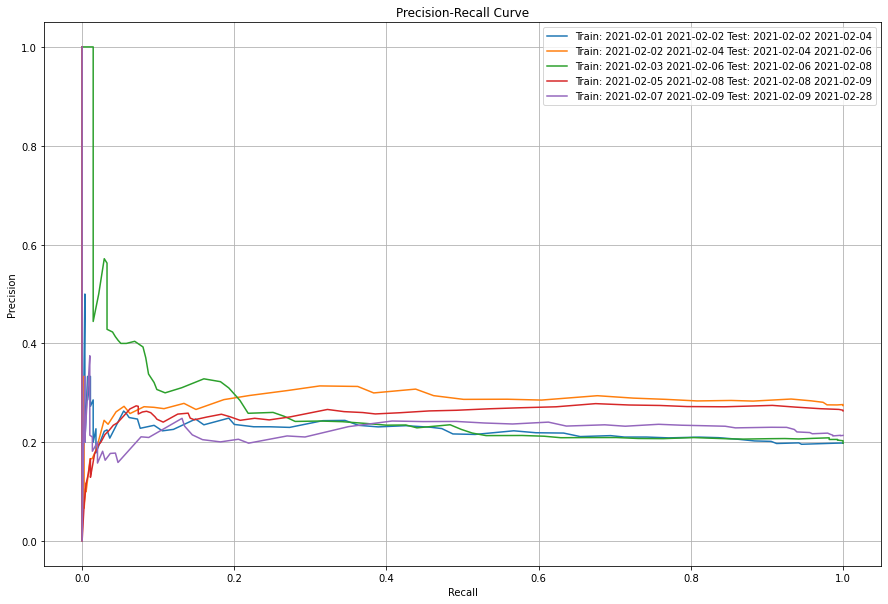

In [35]:
model.plot_precision_recall_curve()

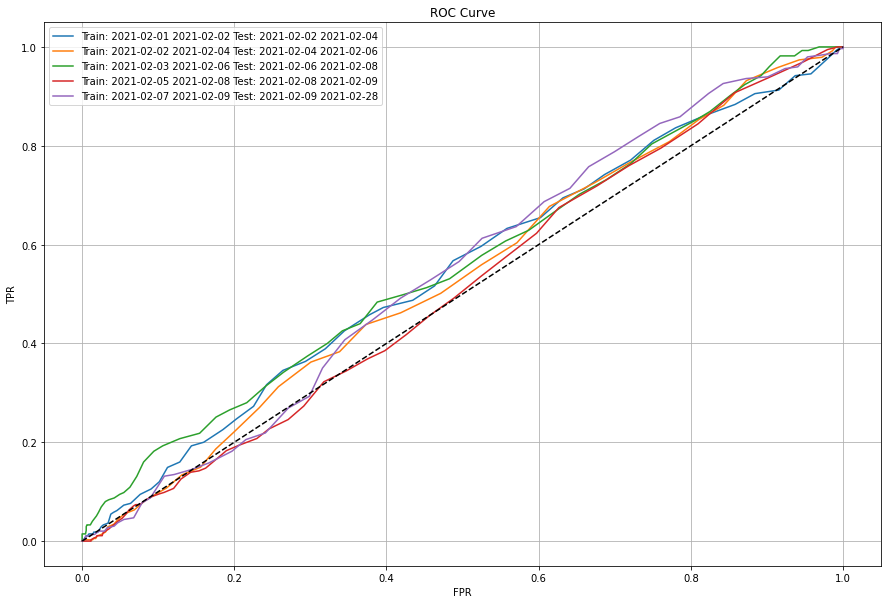

In [36]:
model.plot_roc_curve()

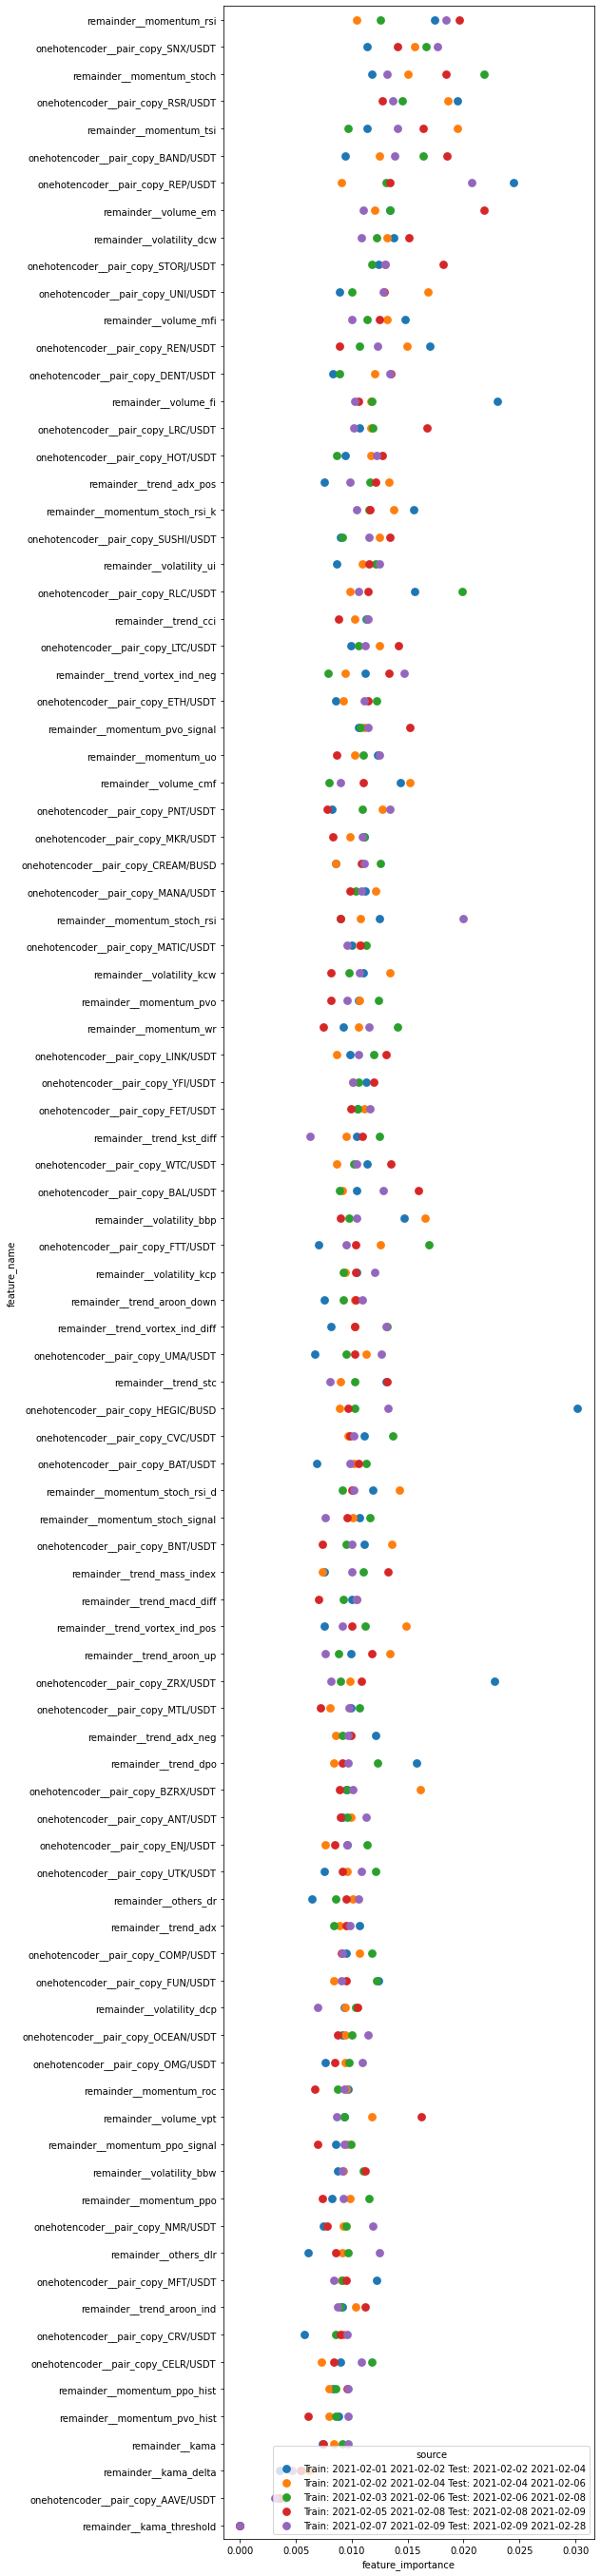

In [37]:
model.plot_feature_importance()

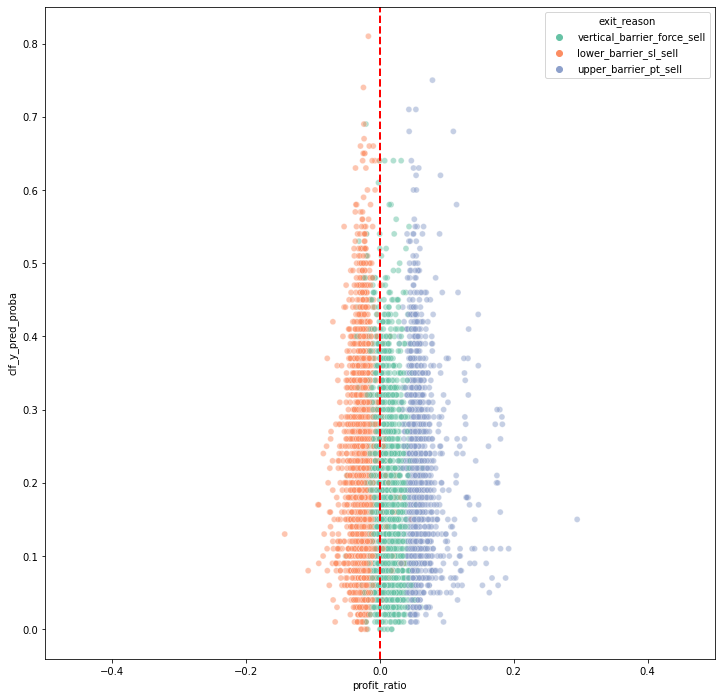

In [38]:
model.plot_probability_returns_scatter()

In [39]:
model.probability_returns_table()

,mean,median,count
clf_y_pred_proba_bin,,,
0.0,0.005889,-0.001623,1290
1.0,0.003157,-0.012704,2240
2.0,0.001749,-0.017233,1884
3.0,0.000177,-0.018384,1043
4.0,0.002800,-0.013327,365
5.0,-0.001038,-0.020643,87
6.0,0.009586,-0.007006,31
7.0,0.037913,0.048697,4
8.0,-0.017006,-0.017006,1


In [ ]:
model.run_train_on_more_data(date_from='2021-01-01')

In [ ]:
model.plot_feature_importance()

In [ ]:
model.model_threshold_table()

In [ ]:
model.set_model_threshold(model_threshold=0.5)

In [ ]:
model.save_model(filename='VulcanMeta.pkl')

# Appendix / Testing (to be deleted)

In [ ]:
idx = pd.IndexSlice

model.data['clf_y_pred_proba'].sort_index(level='date').plot(figsize=(15, 7))
model.data.loc[idx[:, 'ETH/USDT', :]]['profit_ratio'].sort_index(level='date').plot(secondary_y=True)


In [ ]:
feature_names_out = model.clf['full_transformer']['column_transformer'].get_feature_names_out()
feature_names_out

In [ ]:
transformed_data = model.clf['full_transformer'].transform(model.X_test)
transformed_data

In [ ]:
features_out_df = pd.DataFrame(transformed_data, columns=feature_names_out)
features_out_df

In [ ]:
features_out_df.plot(subplots=True, figsize=(10, 400))

In [ ]:
model.X_test.plot(subplots=True, figsize=(10, 400))

In [ ]:
fracdiff_coeff = model.clf['full_transformer']['column_transformer'].transformers_[1][1].d_
fracdiff_coeff

In [ ]:
import fracdiff

In [ ]:
ff = fracdiff.sklearn.FracdiffStat()

In [ ]:
ff.fit(model.X_test['momentum_ppo_hist_btc_12h'].values.reshape(-1, 1))

In [ ]:
model.X_test['momentum_ppo_hist_btc_12h'].plot()

In [ ]:
ff.d_

In [ ]:
model.clf.named_steps['column_transformer'].get_feature_names_out()

In [ ]:
model.roc_stats

In [ ]:
df.to_csv('litmus_labeled_data_peter.csv')

In [ ]:
l = ['onehotencoder__pair_copy_1INCH/USDT',
 'onehotencoder__pair_copy_AAVE/USDT', 'onehotencoder__pair_copy_ACM/USDT',
 'onehotencoder__pair_copy_ADA/USDT', 'onehotencoder__pair_copy_ADX/USDT',
 'onehotencoder__pair_copy_AGLD/USDT', 'onehotencoder__pair_copy_AION/USDT',
 'onehotencoder__pair_copy_AKRO/USDT', 'onehotencoder__pair_copy_ALCX/USDT',
 'onehotencoder__pair_copy_ALGO/USDT',
 'onehotencoder__pair_copy_ALICE/USDT',
 'onehotencoder__pair_copy_ALPACA/USDT',
 'onehotencoder__pair_copy_ALPHA/USDT', 'onehotencoder__pair_copy_AMP/USDT',
 'onehotencoder__pair_copy_ANKR/USDT', 'onehotencoder__pair_copy_ANT/USDT',
 'onehotencoder__pair_copy_AR/USDT', 'onehotencoder__pair_copy_ARDR/USDT',
 'onehotencoder__pair_copy_ARPA/USDT', 'onehotencoder__pair_copy_ASR/USDT',
 'onehotencoder__pair_copy_ATA/USDT', 'onehotencoder__pair_copy_ATM/USDT',
 'onehotencoder__pair_copy_ATOM/USDT',
 'onehotencoder__pair_copy_AUDIO/USDT',
 'onehotencoder__pair_copy_AUTO/USDT', 'onehotencoder__pair_copy_AVA/USDT',
 'onehotencoder__pair_copy_AVAX/USDT', 'onehotencoder__pair_copy_AXS/USDT',
 'onehotencoder__pair_copy_BADGER/USDT',
 'onehotencoder__pair_copy_BAKE/USDT', 'onehotencoder__pair_copy_BAL/USDT',
 'onehotencoder__pair_copy_BAND/USDT', 'onehotencoder__pair_copy_BAR/USDT',
 'onehotencoder__pair_copy_BAT/USDT', 'onehotencoder__pair_copy_BCH/USDT',
 'onehotencoder__pair_copy_BEAM/USDT', 'onehotencoder__pair_copy_BEL/USDT',
 'onehotencoder__pair_copy_BETA/USDT', 'onehotencoder__pair_copy_BICO/USDT',
 'onehotencoder__pair_copy_BLZ/USDT', 'onehotencoder__pair_copy_BNB/USDT',
 'onehotencoder__pair_copy_BNT/USDT', 'onehotencoder__pair_copy_BOND/USDT',
 'onehotencoder__pair_copy_CAKE/USDT', 'onehotencoder__pair_copy_CELO/USDT',
 'onehotencoder__pair_copy_CELR/USDT', 'onehotencoder__pair_copy_CFX/USDT',
 'onehotencoder__pair_copy_CHESS/USDT', 'onehotencoder__pair_copy_CHZ/USDT',
 'onehotencoder__pair_copy_CITY/USDT', 'onehotencoder__pair_copy_CKB/USDT',
 'onehotencoder__pair_copy_CLV/USDT', 'onehotencoder__pair_copy_COMP/USDT',
 'onehotencoder__pair_copy_COS/USDT', 'onehotencoder__pair_copy_COTI/USDT',
 'onehotencoder__pair_copy_CRV/USDT', 'onehotencoder__pair_copy_CTK/USDT',
 'onehotencoder__pair_copy_CTXC/USDT', 'onehotencoder__pair_copy_CVC/USDT',
 'onehotencoder__pair_copy_CVP/USDT', 'onehotencoder__pair_copy_CVX/USDT',
 'onehotencoder__pair_copy_DASH/USDT', 'onehotencoder__pair_copy_DCR/USDT',
 'onehotencoder__pair_copy_DENT/USDT', 'onehotencoder__pair_copy_DF/USDT',
 'onehotencoder__pair_copy_DGB/USDT', 'onehotencoder__pair_copy_DIA/USDT',
 'onehotencoder__pair_copy_DNT/USDT', 'onehotencoder__pair_copy_DOCK/USDT',
 'onehotencoder__pair_copy_DODO/USDT', 'onehotencoder__pair_copy_DOGE/USDT',
 'onehotencoder__pair_copy_DOT/USDT', 'onehotencoder__pair_copy_DUSK/USDT',
 'onehotencoder__pair_copy_DYDX/USDT', 'onehotencoder__pair_copy_EGLD/USDT',
 'onehotencoder__pair_copy_ELF/USDT', 'onehotencoder__pair_copy_ENJ/USDT',
 'onehotencoder__pair_copy_ENS/USDT', 'onehotencoder__pair_copy_EOS/USDT',
 'onehotencoder__pair_copy_EPS/USDT', 'onehotencoder__pair_copy_ERN/USDT',
 'onehotencoder__pair_copy_ETC/USDT', 'onehotencoder__pair_copy_ETH/USDT',
 'onehotencoder__pair_copy_FARM/USDT', 'onehotencoder__pair_copy_FET/USDT',
 'onehotencoder__pair_copy_FIDA/USDT', 'onehotencoder__pair_copy_FIL/USDT',
 'onehotencoder__pair_copy_FIO/USDT', 'onehotencoder__pair_copy_FIRO/USDT',
 'onehotencoder__pair_copy_FIS/USDT', 'onehotencoder__pair_copy_FLM/USDT',
 'onehotencoder__pair_copy_FLOW/USDT', 'onehotencoder__pair_copy_FLUX/USDT',
 'onehotencoder__pair_copy_FOR/USDT', 'onehotencoder__pair_copy_FORTH/USDT',
 'onehotencoder__pair_copy_FRONT/USDT', 'onehotencoder__pair_copy_FTM/USDT',
 'onehotencoder__pair_copy_FTT/USDT', 'onehotencoder__pair_copy_FUN/USDT',
 'onehotencoder__pair_copy_FXS/USDT', 'onehotencoder__pair_copy_GALA/USDT',
 'onehotencoder__pair_copy_GHST/USDT', 'onehotencoder__pair_copy_GRT/USDT',
 'onehotencoder__pair_copy_HARD/USDT', 'onehotencoder__pair_copy_HBAR/USDT',
 'onehotencoder__pair_copy_HIVE/USDT', 'onehotencoder__pair_copy_HNT/USDT',
 'onehotencoder__pair_copy_ICP/USDT', 'onehotencoder__pair_copy_ICX/USDT',
 'onehotencoder__pair_copy_IDEX/USDT', 'onehotencoder__pair_copy_ILV/USDT',
 'onehotencoder__pair_copy_INJ/USDT', 'onehotencoder__pair_copy_IOST/USDT',
 'onehotencoder__pair_copy_IOTA/USDT', 'onehotencoder__pair_copy_IOTX/USDT',
 'onehotencoder__pair_copy_IRIS/USDT',
 'onehotencoder__pair_copy_JASMY/USDT', 'onehotencoder__pair_copy_JST/USDT',
 'onehotencoder__pair_copy_JUV/USDT', 'onehotencoder__pair_copy_KAVA/USDT',
 'onehotencoder__pair_copy_KLAY/USDT', 'onehotencoder__pair_copy_KMD/USDT',
 'onehotencoder__pair_copy_KNC/USDT', 'onehotencoder__pair_copy_KP3R/USDT',
 'onehotencoder__pair_copy_KSM/USDT', 'onehotencoder__pair_copy_LINA/USDT',
 'onehotencoder__pair_copy_LINK/USDT', 'onehotencoder__pair_copy_LIT/USDT',
 'onehotencoder__pair_copy_LPT/USDT', 'onehotencoder__pair_copy_LRC/USDT',
 'onehotencoder__pair_copy_LSK/USDT', 'onehotencoder__pair_copy_LTC/USDT',
 'onehotencoder__pair_copy_LTO/USDT', 'onehotencoder__pair_copy_LUNA/USDT',
 'onehotencoder__pair_copy_MANA/USDT', 'onehotencoder__pair_copy_MASK/USDT',
 'onehotencoder__pair_copy_MATIC/USDT', 'onehotencoder__pair_copy_MC/USDT',
 'onehotencoder__pair_copy_MDT/USDT', 'onehotencoder__pair_copy_MDX/USDT',
 'onehotencoder__pair_copy_MFT/USDT', 'onehotencoder__pair_copy_MINA/USDT',
 'onehotencoder__pair_copy_MITH/USDT', 'onehotencoder__pair_copy_MKR/USDT',
 'onehotencoder__pair_copy_MLN/USDT', 'onehotencoder__pair_copy_MTL/USDT',
 'onehotencoder__pair_copy_NBS/USDT', 'onehotencoder__pair_copy_NEAR/USDT',
 'onehotencoder__pair_copy_NEO/USDT', 'onehotencoder__pair_copy_NKN/USDT',
 'onehotencoder__pair_copy_NMR/USDT', 'onehotencoder__pair_copy_NULS/USDT',
 'onehotencoder__pair_copy_OCEAN/USDT', 'onehotencoder__pair_copy_OG/USDT',
 'onehotencoder__pair_copy_OGN/USDT', 'onehotencoder__pair_copy_OM/USDT',
 'onehotencoder__pair_copy_OMG/USDT', 'onehotencoder__pair_copy_ONE/USDT',
 'onehotencoder__pair_copy_ONG/USDT', 'onehotencoder__pair_copy_ONT/USDT',
 'onehotencoder__pair_copy_OOKI/USDT', 'onehotencoder__pair_copy_ORN/USDT',
 'onehotencoder__pair_copy_OXT/USDT',
 'onehotencoder__pair_copy_PEOPLE/USDT',
 'onehotencoder__pair_copy_PERP/USDT', 'onehotencoder__pair_copy_PHA/USDT',
 'onehotencoder__pair_copy_PLA/USDT', 'onehotencoder__pair_copy_PNT/USDT',
 'onehotencoder__pair_copy_POLS/USDT', 'onehotencoder__pair_copy_POLY/USDT',
 'onehotencoder__pair_copy_POND/USDT', 'onehotencoder__pair_copy_POWR/USDT',
 'onehotencoder__pair_copy_PSG/USDT', 'onehotencoder__pair_copy_PYR/USDT',
 'onehotencoder__pair_copy_QI/USDT', 'onehotencoder__pair_copy_QNT/USDT',
 'onehotencoder__pair_copy_QTUM/USDT',
 'onehotencoder__pair_copy_QUICK/USDT', 'onehotencoder__pair_copy_RAD/USDT',
 'onehotencoder__pair_copy_RAMP/USDT', 'onehotencoder__pair_copy_RARE/USDT',
 'onehotencoder__pair_copy_RAY/USDT', 'onehotencoder__pair_copy_REEF/USDT',
 'onehotencoder__pair_copy_REN/USDT', 'onehotencoder__pair_copy_REP/USDT',
 'onehotencoder__pair_copy_RGT/USDT', 'onehotencoder__pair_copy_RIF/USDT',
 'onehotencoder__pair_copy_RLC/USDT', 'onehotencoder__pair_copy_RNDR/USDT',
 'onehotencoder__pair_copy_ROSE/USDT', 'onehotencoder__pair_copy_RSR/USDT',
 'onehotencoder__pair_copy_RUNE/USDT', 'onehotencoder__pair_copy_RVN/USDT',
 'onehotencoder__pair_copy_SAND/USDT',
 'onehotencoder__pair_copy_SANTOS/USDT',
 'onehotencoder__pair_copy_SFP/USDT', 'onehotencoder__pair_copy_SHIB/USDT',
 'onehotencoder__pair_copy_SKL/USDT', 'onehotencoder__pair_copy_SLP/USDT',
 'onehotencoder__pair_copy_SNX/USDT', 'onehotencoder__pair_copy_SOL/USDT',
 'onehotencoder__pair_copy_SPELL/USDT', 'onehotencoder__pair_copy_SRM/USDT',
 'onehotencoder__pair_copy_STMX/USDT',
 'onehotencoder__pair_copy_STORJ/USDT',
 'onehotencoder__pair_copy_STPT/USDT',
 'onehotencoder__pair_copy_STRAX/USDT', 'onehotencoder__pair_copy_STX/USDT',
 'onehotencoder__pair_copy_SUPER/USDT',
 'onehotencoder__pair_copy_SUSHI/USDT', 'onehotencoder__pair_copy_SXP/USDT',
 'onehotencoder__pair_copy_SYS/USDT', 'onehotencoder__pair_copy_TFUEL/USDT',
 'onehotencoder__pair_copy_THETA/USDT', 'onehotencoder__pair_copy_TKO/USDT',
 'onehotencoder__pair_copy_TLM/USDT', 'onehotencoder__pair_copy_TOMO/USDT',
 'onehotencoder__pair_copy_TORN/USDT', 'onehotencoder__pair_copy_TRB/USDT',
 'onehotencoder__pair_copy_TRIBE/USDT',
 'onehotencoder__pair_copy_TROY/USDT', 'onehotencoder__pair_copy_TRU/USDT',
 'onehotencoder__pair_copy_TRX/USDT', 'onehotencoder__pair_copy_TVK/USDT',
 'onehotencoder__pair_copy_TWT/USDT', 'onehotencoder__pair_copy_UMA/USDT',
 'onehotencoder__pair_copy_UNFI/USDT', 'onehotencoder__pair_copy_UNI/USDT',
 'onehotencoder__pair_copy_UTK/USDT', 'onehotencoder__pair_copy_VET/USDT',
 'onehotencoder__pair_copy_VITE/USDT', 'onehotencoder__pair_copy_VTHO/USDT',
 'onehotencoder__pair_copy_WAN/USDT', 'onehotencoder__pair_copy_WAVES/USDT',
 'onehotencoder__pair_copy_WAXP/USDT', 'onehotencoder__pair_copy_WIN/USDT',
 'onehotencoder__pair_copy_WING/USDT', 'onehotencoder__pair_copy_WRX/USDT',
 'onehotencoder__pair_copy_WTC/USDT', 'onehotencoder__pair_copy_XEC/USDT',
 'onehotencoder__pair_copy_XEM/USDT', 'onehotencoder__pair_copy_XLM/USDT',
 'onehotencoder__pair_copy_XMR/USDT', 'onehotencoder__pair_copy_XRP/USDT',
 'onehotencoder__pair_copy_XTZ/USDT', 'onehotencoder__pair_copy_XVG/USDT',
 'onehotencoder__pair_copy_XVS/USDT', 'onehotencoder__pair_copy_YFI/USDT',
 'onehotencoder__pair_copy_YFII/USDT', 'onehotencoder__pair_copy_YGG/USDT',
 'onehotencoder__pair_copy_ZEC/USDT', 'onehotencoder__pair_copy_ZEN/USDT',
 'onehotencoder__pair_copy_ZIL/USDT', 'onehotencoder__pair_copy_ZRX/USDT',
 'remainder__volume_cmf', 'remainder__volume_fi', 'remainder__volume_em',
 'remainder__volume_vpT']

In [ ]:
for i, j in enumerate(l):
    print(i, j)

In [ ]:
tuple(i for (i, j) in enumerate(l) if 'onehotencoder__' in j)

In [ ]:
gn_cols = [c for c in df.columns if 'gn_' in c]

In [ ]:
import matplotlib.pyplot as plt

for k, d in df.groupby('pair_copy'):
    for c in gn_cols + ['momentum_ppo']:
        title = str(k) + "" + str(c)
        d[c].plot(title=title, figsize=(20,7))
        d['close'].plot(secondary_y=True)
        plt.show()

In [ ]:
model.data.groupby(model.data.date_btc_5m.dt.week).size()

In [ ]:
model.data.to_csv('glassnode_pair_backtest_trades_data.csv')

In [ ]:
from user_data.litmus import indicator_helpers

In [ ]:
indicator_helpers.daily_volatility(df['close'])

In [ ]:
test = df.reset_index()

In [ ]:
test[['date', 'close']]

In [ ]:
test.set_index(keys='date', inplace=True)
test

In [ ]:
test[test['pair_copy'] == 'AAVE/USDT']

In [ ]:
x = indicator_helpers.daily_volatility(test[test['pair_copy'] == 'ETH/USDT'], 288, 50)

In [ ]:
x['daily_volatility']

In [41]:
df[['open_rate', 'close_rate', 'profit_ratio', 'profit_abs', 'trade_duration', 'exit_reason']]

open_rate  close_rate  \
strategy    pair      date                                               
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00   298.3990    297.7000   
                      2021-02-01 03:55:00+00:00   299.8320    293.0880   
                      2021-02-01 11:00:00+00:00   295.8670    289.2810   
                      2021-02-01 14:40:00+00:00   291.5240    305.1590   
                      2021-02-01 16:25:00+00:00   289.7780    305.1590   
...                                                    ...         ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00     1.4882      1.4589   
                      2021-02-10 22:05:00+00:00     1.4885      1.4998   
                      2021-02-10 22:25:00+00:00     1.4891      1.4998   
                      2021-02-10 23:25:00+00:00     1.4960      1.4827   
                      2021-02-11 02:00:00+00:00     1.4986      1.5253   

                                                 profit_ratio  profit_abs  \
strategy    pair      date                                                  
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00     -0.004336   -0.434016   
                      2021-02-01 03:55:00+00:00     -0.024446   -2.447010   
                      2021-02-01 11:00:00+00:00     -0.024214   -2.423774   
                      2021-02-01 14:40:00+00:00      0.044680    4.472468   
                      2021-02-01 16:25:00+00:00      0.050975    5.102549   
...                                                       ...         ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00     -0.021647   -2.166853   
                      2021-02-10 22:05:00+00:00      0.005578    0.558394   
                      2021-02-10 22:25:00+00:00      0.005173    0.517836   
                      2021-02-10 23:25:00+00:00     -0.010871   -1.088148   
                      2021-02-11 02:00:00+00:00      0.015783    1.579881   

                                                 trade_duration  \
strategy    pair      date                                        
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00             365   
                      2021-02-01 03:55:00+00:00             270   
                      2021-02-01 11:00:00+00:00             110   
                      2021-02-01 14:40:00+00:00             320   
                      2021-02-01 16:25:00+00:00             215   
...                                                         ...   
            ZRX/USDT  2021-02-10 21:50:00+00:00             180   
                      2021-02-10 22:05:00+00:00             365   
                      2021-02-10 22:25:00+00:00             365   
                      2021-02-10 23:25:00+00:00              40   
                      2021-02-11 02:00:00+00:00             365   

                                                                 exit_reason  
strategy    pair      date                                                    
KamaPrimary AAVE/USDT 2021-02-01 01:35:00+00:00  vertical_barrier_force_sell  
                      2021-02-01 03:55:00+00:00        lower_barrier_sl_sell  
                      2021-02-01 11:00:00+00:00        lower_barrier_sl_sell  
                      2021-02-01 14:40:00+00:00        upper_barrier_pt_sell  
                      2021-02-01 16:25:00+00:00        upper_barrier_pt_sell  
...                                                                      ...  
            ZRX/USDT  2021-02-10 21:50:00+00:00        lower_barrier_sl_sell  
                      2021-02-10 22:05:00+00:00  vertical_barrier_force_sell  
                      2021-02-10 22:25:00+00:00  vertical_barrier_force_sell  
                      2021-02-10 23:25:00+00:00        lower_barrier_sl_sell  
                      2021-02-11 02:00:00+00:00  vertical_barrier_force_sell  

[8336 rows x 6 columns]

In [48]:
x = df[df['exit_reason'] == 'lower_barrier_sl_sell']
x = x[x['profit_ratio'] > 0]
x[['open_rate', 'close_rate', 'profit_ratio', 'profit_abs', 'trade_duration', 'exit_reason', 'lower_threshold', 'upper_threshold']]

open_rate   close_rate  \
strategy    pair       date                                                  
KamaPrimary ANT/USDT   2021-02-06 08:35:00+00:00     5.635300     5.667600   
            BNT/USDT   2021-02-02 00:40:00+00:00     1.997500     2.006100   
                       2021-02-03 23:15:00+00:00     2.115900     2.132200   
            BZRX/USDT  2021-02-03 02:55:00+00:00     0.398400     0.399600   
            CELR/USDT  2021-02-09 06:15:00+00:00     0.016740     0.016810   
            CREAM/BUSD 2021-02-04 20:30:00+00:00   360.000000   362.897000   
            CVC/USDT   2021-02-05 21:45:00+00:00     0.265540     0.272430   
                       2021-02-06 05:30:00+00:00     0.237840     0.243080   
            DENT/USDT  2021-02-08 23:40:00+00:00     0.000523     0.000528   
                       2021-02-09 14:45:00+00:00     0.000771     0.000780   
            DODO/USDT  2021-02-22 08:20:00+00:00     6.499000     6.519000   
            ENJ/USDT   2021-02-04 18:55:00+00:00     0.360800     0.361530   
            FET/USDT   2021-02-03 17:55:00+00:00     0.140480     0.144090   
                       2021-02-07 12:35:00+00:00     0.177520     0.178500   
            FUN/USDT   2021-02-01 14:10:00+00:00     0.034193     0.034614   
            HEGIC/BUSD 2021-02-02 05:20:00+00:00     0.344200     0.349100   
                       2021-02-02 20:55:00+00:00     0.319600     0.321400   
            MANA/USDT  2021-02-05 22:40:00+00:00     0.219360     0.222500   
            MATIC/USDT 2021-02-03 17:15:00+00:00     0.042250     0.042500   
                       2021-02-05 15:15:00+00:00     0.050970     0.051200   
                       2021-02-10 10:05:00+00:00     0.128610     0.130830   
            MFT/USDT   2021-02-01 07:20:00+00:00     0.006851     0.007039   
                       2021-02-03 23:00:00+00:00     0.010202     0.010353   
            MKR/USDT   2021-02-05 13:55:00+00:00  2597.840000  2607.890000   
            MTL/USDT   2021-02-04 00:45:00+00:00     0.531300     0.539700   
                       2021-02-04 03:35:00+00:00     0.524500     0.525700   
                       2021-02-05 00:35:00+00:00     0.565000     0.578000   
                       2021-02-05 04:40:00+00:00     0.587200     0.599800   
                       2021-02-05 07:40:00+00:00     0.720800     0.738100   
                       2021-02-05 08:15:00+00:00     0.792100     0.822200   
            OMG/USDT   2021-02-01 12:55:00+00:00     3.964600     4.049700   
            PNT/USDT   2021-02-09 05:00:00+00:00     0.892800     0.903000   
                       2021-02-09 09:30:00+00:00     1.089300     1.111000   
                       2021-02-10 11:10:00+00:00     1.358300     1.402900   
                       2021-02-11 09:00:00+00:00     2.046900     2.081100   
                       2021-02-24 09:10:00+00:00     1.483500     1.500100   
            REN/USDT   2021-02-05 04:00:00+00:00     0.918640     0.923380   
            RLC/USDT   2021-02-05 20:20:00+00:00     1.470800     1.482800   
            RSR/USDT   2021-02-10 17:15:00+00:00     0.054440     0.054820   
            UMA/USDT   2021-02-03 22:40:00+00:00    26.891000    28.224000   
                       2021-02-04 08:40:00+00:00    34.514000    35.658000   
            ZRX/USDT   2021-02-05 12:50:00+00:00     1.388100     1.397900   

                                                  profit_ratio  profit_abs  \
strategy    pair       date                                                  
KamaPrimary ANT/USDT   2021-02-06 08:35:00+00:00      0.003722    0.372600   
            BNT/USDT   2021-02-02 00:40:00+00:00      0.002299    0.230108   
                       2021-02-03 23:15:00+00:00      0.005690    0.569587   
            BZRX/USDT  2021-02-03 02:55:00+00:00      0.001008    0.100904   
            CELR/USDT  2021-02-09 06:15:00+00:00      0.002175    0.217742   
            CREAM/BUSD 2021-02-04 20:30:00+00:00      0.006033    0.60391